In [1]:
# Some Aditional features about the project

In [2]:
import numpy as np # for handling missing data
import pandas as pd # for data manipulation and cleaning
import matplotlib.pyplot as plt # for plotting data records
import seaborn as sns # for advanced visualization

In [3]:
# Load the dataset
df = pd.read_csv(r"C:\Users\yashr\Downloads\india_crime_data_5000_inconsistent.csv")

In [4]:
# View first few rows
df.head(3)

,Crime_ID,Crime_Type,City,Date_of_Occurrence,Time_of_Occurrence,Severity_Level,Latitude,Longitude,Reporting_Channel,Weather_Condition,Day_of_Week,Number_of_Witnesses,Injuries_Report,Arrests_Made,Suspect_Identified,Response_Time (minutes),Offender_Age_Group,Temperature (°C),Festival/Season,Victim_Occupation
0,a6c7b480-509e-4325-9aad-6b51cfa92ed9,Burglary,Kolkata,2023-12-31,20:27:11,High,36.506183,87.691877,Anonymous Tip,Cloudy,Friday,10,Yes,Yes,No,18,Juvenile,16.0,Holi,Teacher
1,1da5fd94-c182-4881-9cff-b32f0f3e29c5,Cybercrime,Lucknow,2024-12-06,20:01:51,Medium,25.078044,82.616198,Helpline,Stormy,Friday,5,No,Yes,Yes,5,26-40,35.0,Christmas,Student
2,46ff2bd0-9582-4eea-a528-d82187743021,Vandalism,Lucknow,2020-04-28,19:07:04,Low,11.338849,84.648488,Online,Clear,Wednesday,4,Yes,No,No,18,26-40,23.0,Pongal,Business


In [ ]:
# 💡 1. Crime Reporting Delay Impact
# 🎯 Objective:
# Analyze the effect of delay between crime occurrence and crime reporting on severity and arrests.

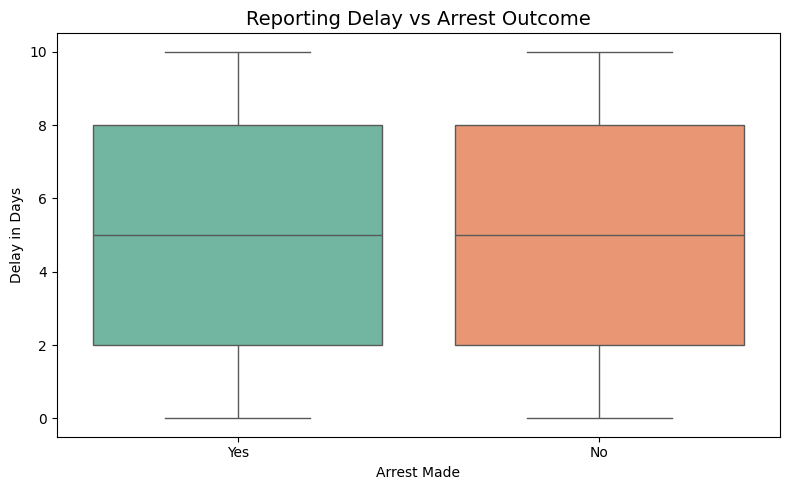

In [16]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Arrests_Made', y='Reporting_Delay', hue='Arrests_Made', palette='Set2', legend=False)
plt.title("Reporting Delay vs Arrest Outcome", fontsize=14)
plt.ylabel("Delay in Days")
plt.xlabel("Arrest Made")
plt.tight_layout()
plt.show()

In [ ]:
# 💡 2. City-wise Crime Type Diversity Index
# 🎯 Objective:
# Use Shannon entropy to calculate diversity of crimes in each city (higher means more varied crime types).

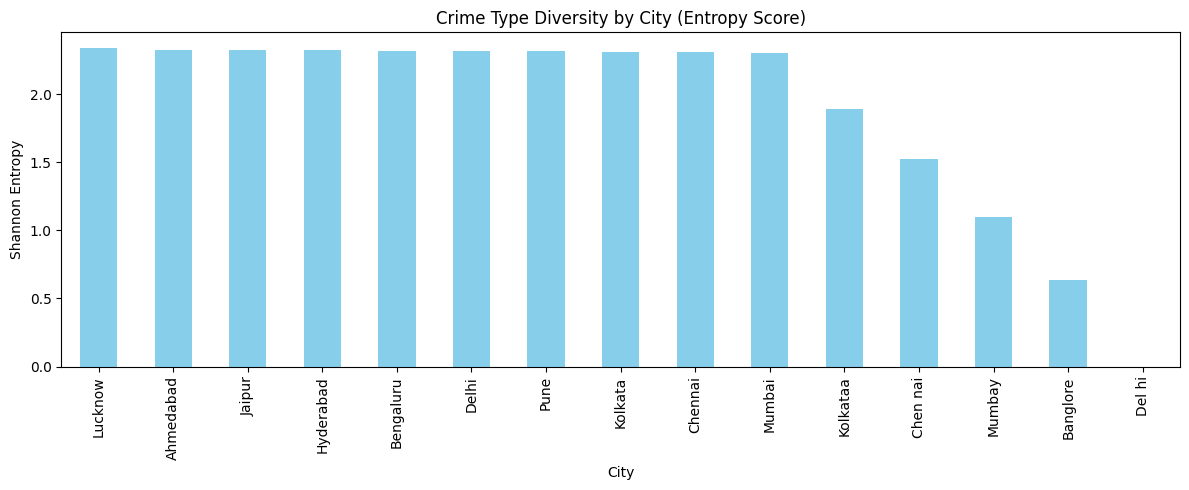

In [7]:
from scipy.stats import entropy

crime_entropy = df.groupby('City')['Crime_Type'].value_counts(normalize=True).unstack(fill_value=0)
diversity_score = crime_entropy.apply(lambda x: entropy(x), axis=1)

diversity_score.sort_values(ascending=False).plot(kind='bar', figsize=(12, 5), color='skyblue')
plt.title("Crime Type Diversity by City (Entropy Score)")
plt.ylabel("Shannon Entropy")
plt.xlabel("City")
plt.tight_layout()
plt.show()

In [ ]:
# 💡 3. Police Response Time Ranking by Weather Conditions
# 🎯 Objective:
# Check if weather delays police response (e.g., during rain/fog).

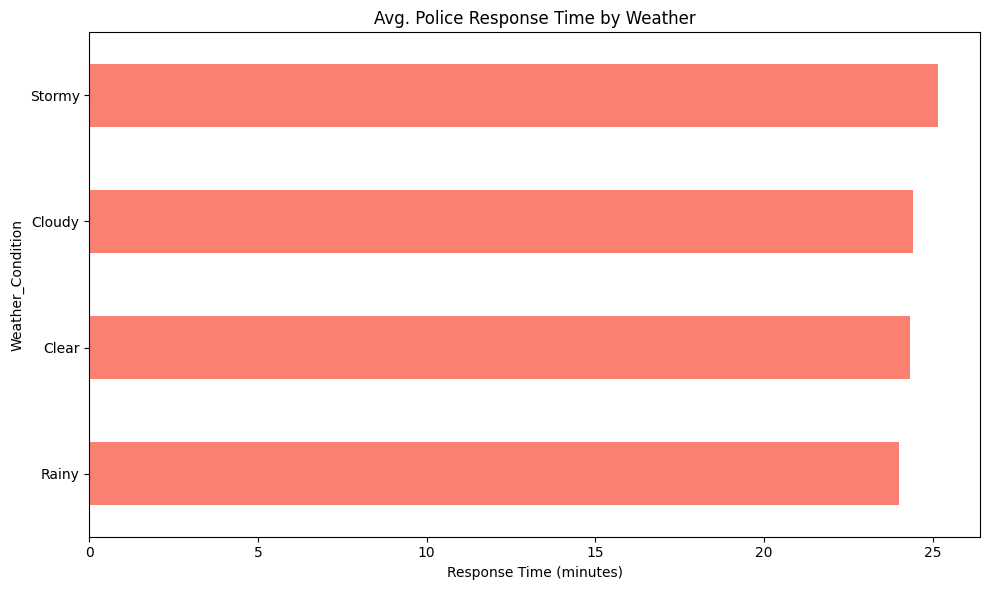

In [9]:
weather_avg_response = df.groupby('Weather_Condition')['Response_Time (minutes)'].mean().sort_values()

weather_avg_response.plot(kind='barh', figsize=(10, 6), color='salmon')
plt.title("Avg. Police Response Time by Weather")
plt.xlabel("Response Time (minutes)")
plt.tight_layout()
plt.show()

In [ ]:
# 💡 4. Hourly Arrest Efficiency Rate
# 🎯 Objective:
# Find out which hours of the day lead to better arrest ratios.

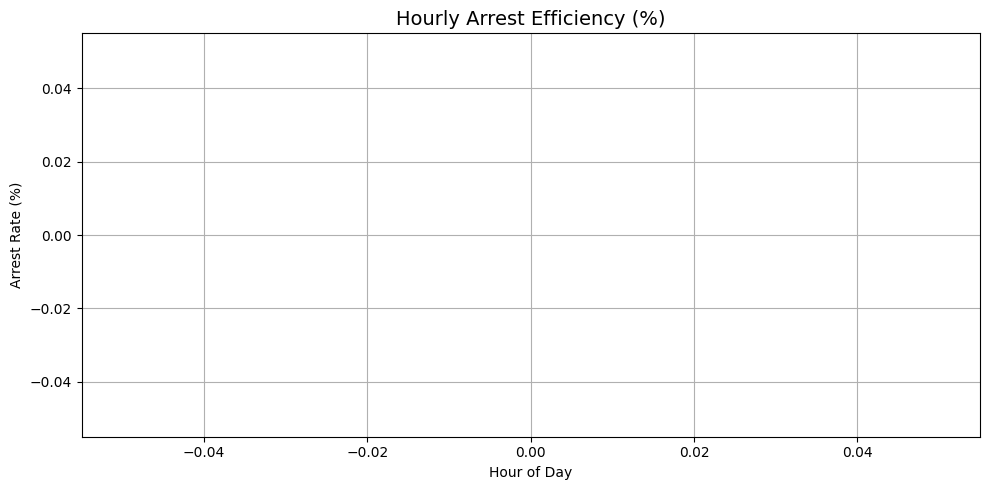

In [19]:
import matplotlib.pyplot as plt

# Ensure uniform 'Yes' and 'No' values
df['Arrests_Made'] = df['Arrests_Made'].astype(str).str.strip().str.title()

# Extract hour safely
df['Hour'] = pd.to_datetime(df['Time_of_Occurrence'], format='%H:%M', errors='coerce').dt.hour

# Filter out rows where hour is NaN
df_hour = df.dropna(subset=['Hour'])

# Calculate arrest rate per hour
arrest_hourly = df_hour.groupby('Hour')['Arrests_Made'].apply(lambda x: (x == 'Yes').mean() * 100)

# Ensure numeric type
arrest_hourly = arrest_hourly.astype(float)

# Plot line chart
plt.figure(figsize=(10, 5))
plt.plot(arrest_hourly.index, arrest_hourly.values, marker='o', color='green')
plt.title("Hourly Arrest Efficiency (%)", fontsize=14)
plt.xlabel("Hour of Day")
plt.ylabel("Arrest Rate (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# 💡 5. Victim Occupation Risk Matrix (Severity vs Crime Type)
# 🎯 Objective:
# Map how different occupations are linked to certain crimes and their severities.

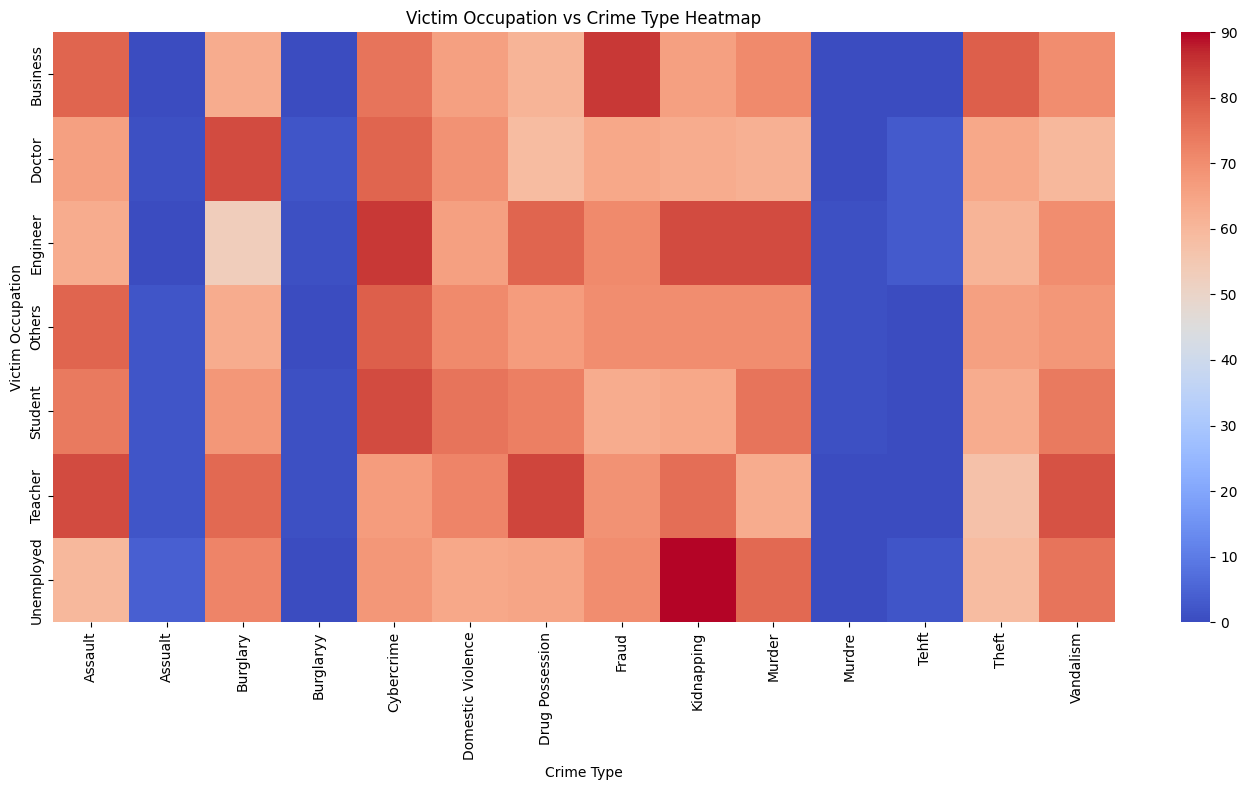

In [12]:
heat_data = pd.crosstab(df['Victim_Occupation'], df['Crime_Type'])

plt.figure(figsize=(14, 8))
sns.heatmap(heat_data, cmap='coolwarm', annot=False)
plt.title("Victim Occupation vs Crime Type Heatmap")
plt.xlabel("Crime Type")
plt.ylabel("Victim Occupation")
plt.tight_layout()
plt.show()

In [ ]:
# ✅ Summary Table

# Feature	                                                           Why It’s Unique
# 🕐 Crime Reporting Delay vs                                       Arrest	Time-sensitivity in outcomes
# 📊 Diversity Score per City	                                      City-level crime variety via entropy
# 🌧️ Weather-based Response Time	                                  Shows environment’s impact on policing
# ⏱️ Arrest Efficiency by Hour	                                  Best hours for catching suspects
# 🧑‍💼 Occupation Risk Heatmap	                                      Social insight on targeted professions
